# Question 1

In [17]:
# !pip install yfinance
# !pip install matplotlib
# !pip install pandas==1.3.3

   ---------------------------------------- 10.2/10.2 MB 12.0 MB/s  0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
recommenders 1.1.1 requires scikit-learn<1.0.3,>=0.22.1, but you have scikit-learn 1.6.0 which is incompatible.


In [ ]:
import pandas as pd
import matplotlib as plt

In [25]:
# I had to use a different source since yahoo finance is geoblocked for me. 

url = "https://stooq.com/q/d/l/?s=tsla.us&i=d"
df = pd.read_csv(url)
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

tesla_data_reset = df.reset_index(drop=True)
tesla_data_reset.head()


        Date     Open     High      Low    Close     Volume
0 2010-06-28  1.13333  1.13333  1.13333  1.13333          0
1 2010-06-29  1.26667  1.66667  1.16933  1.59267  281749140
2 2010-06-30  1.71933  2.02800  1.55333  1.58867  257915910
3 2010-07-01  1.66667  1.72800  1.35133  1.46400  123447945
4 2010-07-02  1.53333  1.54000  1.24733  1.28000   77127105


# Question 2

In [47]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text 

soup = BeautifulSoup(html_data, 'html.parser')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text
   
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[Revenue]})], ignore_index=True) 
tesla_revenue.tail()

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


# Question 3

In [42]:
# I had to use a different source since yahoo finance is geoblocked for me. 

url = "https://stooq.com/q/d/l/?s=gme.us&i=d"
df = pd.read_csv(url)
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

gme_data_reset = df.reset_index(drop=True)
gme_data_reset.head()


,Date,Open,High,Low,Close,Volume
0,2005-02-25,1.56202,1.62432,1.56202,1.61932,2373972
1,2005-02-28,1.61592,1.64795,1.61592,1.63445,1607596
2,2005-03-01,1.64962,1.72530,1.63275,1.70510,4726568
3,2005-03-02,1.70510,1.71355,1.69000,1.70685,3920992
4,2005-03-03,1.72362,1.72530,1.68828,1.71355,3622752


# Question 4

In [49]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text 

soup = BeautifulSoup(html_data_2, 'html.parser')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text
   
    # Finally we append the data of each row to the table
    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[Revenue]})], ignore_index=True)  
gme_revenue.tail()

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


# Question 5

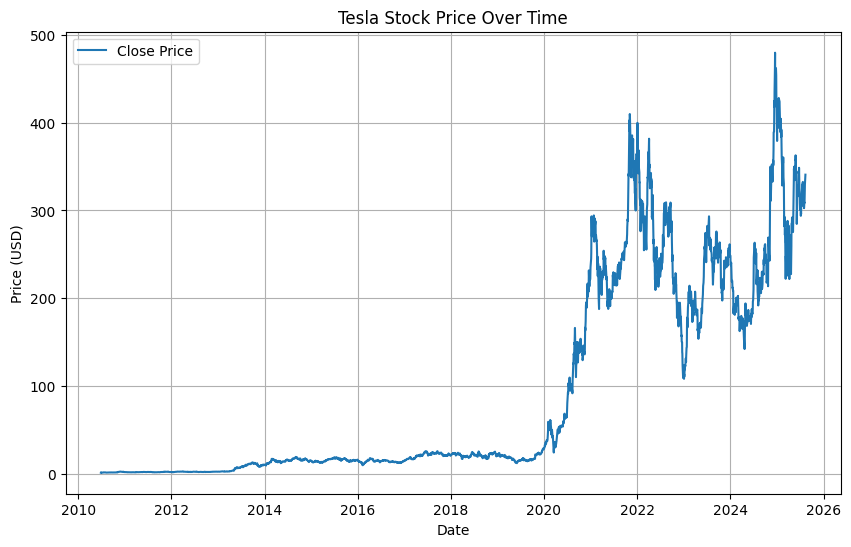

In [51]:
def make_graph(df, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Close'], label="Close Price")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(tesla_data_reset, "Tesla Stock Price Over Time")


# Question 6

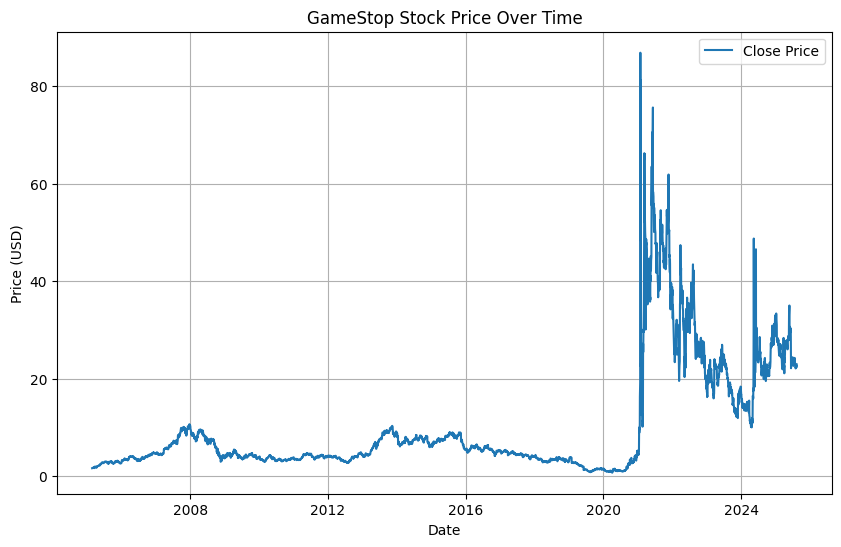

In [53]:
make_graph(gme_data_reset, "GameStop Stock Price Over Time")
